<a href="https://colab.research.google.com/github/Rohandutta1/Image-Recognition/blob/main/Image_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os


2. Loading and Preprocessing the Data

In [ ]:
# Define the path to your dataset
dataset_path = "/content/drive/MyDrive/Dataset/Celebrity Faces Dataset"

# Preprocessing images (resizing, rescaling)
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

# Load train and validation data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1440 images belonging to 17 classes.
Found 360 images belonging to 17 classes.


Image batch shape: (32, 128, 128, 3)
Label batch shape: (32, 17)


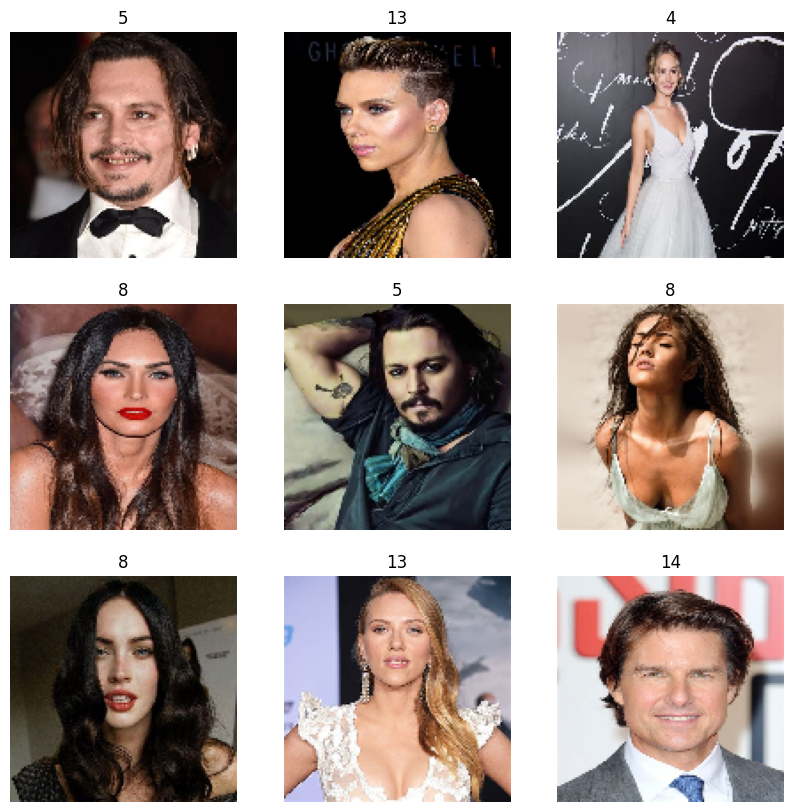

In [ ]:
# Get a batch of images and labels from the training data
images, labels = next(train_data)

# Print the shape of the images and labels
print("Image batch shape:", images.shape)  # e.g., (32, 128, 128, 3)
print("Label batch shape:", labels.shape)   # e.g., (32, num_classes)

import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot images with their labels
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    num_images = min(9, len(images))  # Display up to 9 images
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)  # Create a 3x3 grid for the images
        plt.imshow(images[i])      # Display the image
        plt.axis('off')            # Hide the axes
        plt.title(np.argmax(labels[i]))  # Display the label (class index)
    plt.show()

# Call the function to plot the images
plot_images(images, labels)

3. Building the Model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(128, 128, 3)),  # Define input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of celebrities
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 17)                  │         426,513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 519,761 (1.98 MB)

 Trainable params: 519,761 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

None


4. Training the Model

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5  # Start with 5 epochs
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 392s 8s/step - accuracy: 0.0879 - loss: 2.8478 - val_accuracy: 0.1639 - val_loss: 2.6035
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2191 - loss: 2.4527 - val_accuracy: 0.2583 - val_loss: 2.2065
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.4196 - loss: 1.8365 - val_accuracy: 0.2972 - val_loss: 2.2105
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5959 - loss: 1.2805 - val_accuracy: 0.3444 - val_loss: 2.3312
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7888 - loss: 0.7574 - val_accuracy: 0.3611 - val_loss: 2.5807


Saving download (1).jpeg to download (1) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


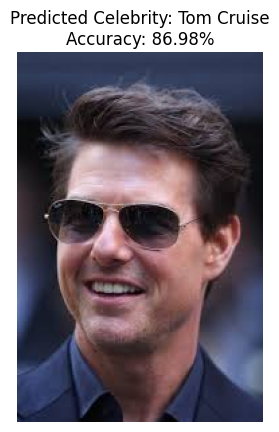

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load the image
    img = cv2.imread(fn)

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the input shape of the model
    img_resized = cv2.resize(img_rgb, (128, 128))

    # Prepare the image for prediction
    img_resized = img_resized / 255  # Rescale
    img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension

    # Predict the celebrity
    pred = model.predict(img_resized)
    predicted_class = np.argmax(pred)

    # Calculate predicted accuracy
    predicted_accuracy = np.max(pred)*100  # Get the maximum probability

    # Get the class labels from the training data
    class_labels = list(train_data.class_indices.keys())

    # Display the image with accuracy
    plt.imshow(img_rgb)
    plt.title(f"Predicted Celebrity: {class_labels[predicted_class]}\nAccuracy: {predicted_accuracy:.2f}%")
    plt.axis('off')  # Hide axes
    plt.show()
